#Bank Customer Churn Prediction using Random Forest Classifier

##Objective
The primary objective of this project is to develop a machine learning model capable of predicting whether a bank customer will churn (leave the bank) or not based on their profile and account activities.

##Data Source
The dataset is sourced from the YBI Foundation's GitHub repository with information including :
>CustomerId, Surname, CreditScore, Geography, Gender, Age, Tenure, Balance, Num Of Products, Has Credit Card, Is Active Member, Estimated Salary, and Churn.

##Import Library

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from imblearn.under_sampling import RandomUnderSampler, EditedNearestNeighbours as ENN
from imblearn.over_sampling import RandomOverSampler, SMOTE
from imblearn.combine import SMOTEENN

##Import Data

In [ ]:
df = pd.read_csv('https://raw.githubusercontent.com/YBIFoundation/Dataset/main/Bank%20Churn%20Modelling.csv')

In [ ]:
df.head()

,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,Num Of Products,Has Credit Card,Is Active Member,Estimated Salary,Churn
0,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


##Describe Data

In [ ]:
# Display information about the DataFrame
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 13 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   CustomerId        10000 non-null  int64  
 1   Surname           10000 non-null  object 
 2   CreditScore       10000 non-null  int64  
 3   Geography         10000 non-null  object 
 4   Gender            10000 non-null  object 
 5   Age               10000 non-null  int64  
 6   Tenure            10000 non-null  int64  
 7   Balance           10000 non-null  float64
 8   Num Of Products   10000 non-null  int64  
 9   Has Credit Card   10000 non-null  int64  
 10  Is Active Member  10000 non-null  int64  
 11  Estimated Salary  10000 non-null  float64
 12  Churn             10000 non-null  int64  
dtypes: float64(2), int64(8), object(3)
memory usage: 1015.8+ KB


In [ ]:
# Display summary statistics
df.describe()

,CustomerId,CreditScore,Age,Tenure,Balance,Num Of Products,Has Credit Card,Is Active Member,Estimated Salary,Churn
count,1.000000e+04,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.00000,10000.000000,10000.000000,10000.000000
mean,1.569094e+07,650.528800,38.921800,5.012800,76485.889288,1.530200,0.70550,0.515100,100090.239881,0.203700
std,7.193619e+04,96.653299,10.487806,2.892174,62397.405202,0.581654,0.45584,0.499797,57510.492818,0.402769
min,1.556570e+07,350.000000,18.000000,0.000000,0.000000,1.000000,0.00000,0.000000,11.580000,0.000000
25%,1.562853e+07,584.000000,32.000000,3.000000,0.000000,1.000000,0.00000,0.000000,51002.110000,0.000000
50%,1.569074e+07,652.000000,37.000000,5.000000,97198.540000,1.000000,1.00000,1.000000,100193.915000,0.000000
75%,1.575323e+07,718.000000,44.000000,7.000000,127644.240000,2.000000,1.00000,1.000000,149388.247500,0.000000
max,1.581569e+07,850.000000,92.000000,10.000000,250898.090000,4.000000,1.00000,1.000000,199992.480000,1.000000


In [ ]:
df.columns

Index(['CustomerId', 'Surname', 'CreditScore', 'Geography', 'Gender', 'Age',
       'Tenure', 'Balance', 'Num Of Products', 'Has Credit Card',
       'Is Active Member', 'Estimated Salary', 'Churn'],
      dtype='object')

##Data Visualization

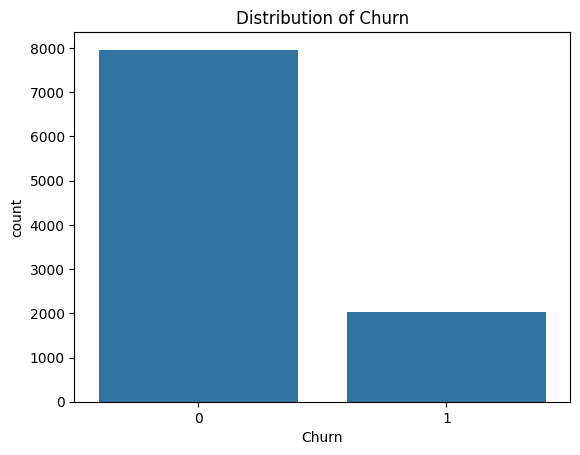

In [ ]:
# Countplot for the target variable 'Churn'
sns.countplot(x='Churn', data=df)
plt.title('Distribution of Churn')
plt.show()

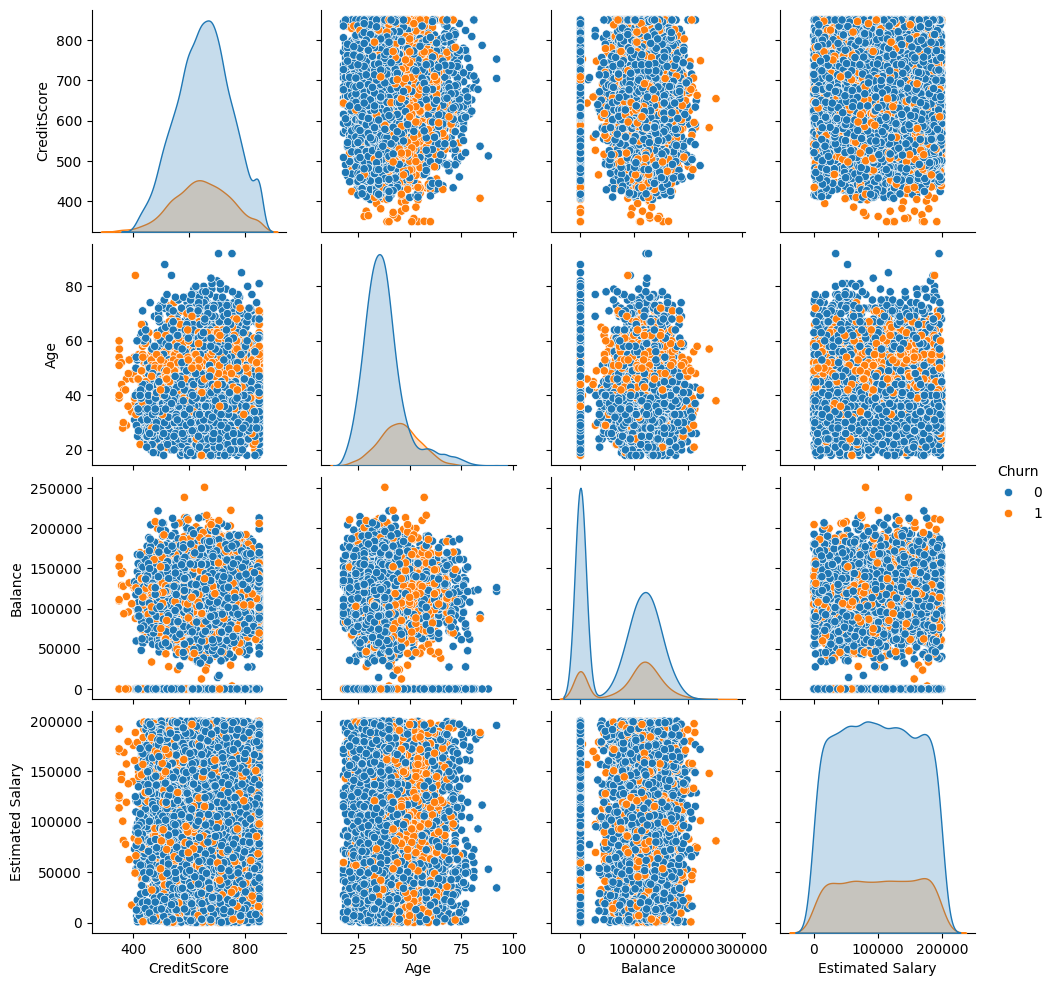

In [ ]:
# Pairplot for selected features
sns.pairplot(df[['CreditScore', 'Age', 'Balance', 'Estimated Salary', 'Churn']], hue='Churn')
plt.show()

##Data Preprocessing

In [ ]:
# Check for missing values
print(df.isnull().sum())

CustomerId          0
Surname             0
CreditScore         0
Geography           0
Gender              0
Age                 0
Tenure              0
Balance             0
Num Of Products     0
Has Credit Card     0
Is Active Member    0
Estimated Salary    0
Churn               0
dtype: int64


In [ ]:
# Drop columns that are not useful for prediction
df = df.drop(['CustomerId', 'Surname'], axis=1)

In [ ]:
# Identify categorical variables
categorical_columns = df.select_dtypes(include=['object']).columns

# Print categorical variables
print("Categorical variables:")
print(categorical_columns)

Categorical variables:
Index(['Geography', 'Gender'], dtype='object')


In [ ]:
# Convert categorical variables into dummy/indicator variables
df = pd.get_dummies(df, drop_first=True)

In [ ]:
df.head()

,CreditScore,Age,Tenure,Balance,Num Of Products,Has Credit Card,Is Active Member,Estimated Salary,Churn,Geography_Germany,Geography_Spain,Gender_Male
0,619,42,2,0.00,1,1,1,101348.88,1,False,False,False
1,608,41,1,83807.86,1,0,1,112542.58,0,False,True,False
2,502,42,8,159660.80,3,1,0,113931.57,1,False,False,False
3,699,39,1,0.00,2,0,0,93826.63,0,False,False,False
4,850,43,2,125510.82,1,1,1,79084.10,0,False,True,False


##Define Target Variable (y) and Feature Variables (X)

In [ ]:
# Define the target variable
y = df['Churn']

# Define the feature variables
X = df.drop('Churn', axis=1)

In [ ]:
X.head()

,CreditScore,Age,Tenure,Balance,Num Of Products,Has Credit Card,Is Active Member,Estimated Salary,Geography_Germany,Geography_Spain,Gender_Male
0,619,42,2,0.00,1,1,1,101348.88,False,False,False
1,608,41,1,83807.86,1,0,1,112542.58,False,True,False
2,502,42,8,159660.80,3,1,0,113931.57,False,False,False
3,699,39,1,0.00,2,0,0,93826.63,False,False,False
4,850,43,2,125510.82,1,1,1,79084.10,False,True,False


In [ ]:
y.head()

0    1
1    0
2    1
3    0
4    0
Name: Churn, dtype: int64

##Train Test Split

In [ ]:
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

##Modeling

In [ ]:
# Define the Random Forest classifier
rf_classifier = RandomForestClassifier(n_estimators=100, random_state=42)

In [ ]:
# Train the model on the training data
rf_classifier.fit(X_train, y_train)

RandomForestClassifier(random_state=42)

In [ ]:
y_pred = rf_classifier.predict(X_test)

##Model Evaluation

In [ ]:
# Evaluate the model on the test data
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy}")

Accuracy: 0.8665


In [ ]:
# Print confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred)
print(f"Confusion Matrix:\n{conf_matrix}")

Confusion Matrix:
[[1548   59]
 [ 208  185]]


In [ ]:
# Print classification report
class_report = classification_report(y_test, y_pred)
print(f"Classification Report:\n{class_report}")

Classification Report:
              precision    recall  f1-score   support

           0       0.88      0.96      0.92      1607
           1       0.76      0.47      0.58       393

    accuracy                           0.87      2000
   macro avg       0.82      0.72      0.75      2000
weighted avg       0.86      0.87      0.85      2000



##Prediction

In [ ]:
# Example prediction
example_data = X_test.iloc[1999].values.reshape(1, -1)
example_pred = rf_classifier.predict(example_data)
print(f"Predicted class for the example data: {example_pred[0]}")

# Visualize the prediction result
print(f"Actual class for the example data: {y_test.iloc[0]}")

Predicted class for the example data: 0
Actual class for the example data: 0


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(


##Explanation
In this project, we developed a model to predict bank customer churn using a Random Forest classifier.

* Data Loading: The dataset was loaded from the provided source.

* Data Exploration and Visualization: We explored and visualized the data to understand its structure and relationships.

* Data Preprocessing: We cleaned the data, handled missing values, and converted categorical variables to numeric form using dummy variables.

* Feature and Target Variables: We defined our target variable (Churn) and feature variables.

* Train Test Split: The data was split into training and testing sets.
Modeling: We trained a Random Forest classifier on the training data and saved the model.

* Model Evaluation: We evaluated the model's performance on the test data, achieving the accuracy of 86.65%, and printed the confusion matrix and classification report.

* Prediction: We made a prediction on an example data point from the test set and compared it to the actual value.

## Performing SMOTE(Synthetic Minority Over-sampling Technique) for OverSampling

### Model Evaluation

In [ ]:
def train_and_evaluate(X_train, y_train, X_test, y_test):
    # Define the Random Forest classifier
    rf_classifier = RandomForestClassifier(random_state=42)

    # Train the model
    rf_classifier.fit(X_train, y_train)

    # Predict on test data
    y_pred = rf_classifier.predict(X_test)

    # Calculate accuracy
    accuracy = accuracy_score(y_test, y_pred)
    print(f"Accuracy: {accuracy}")

    # Print confusion matrix
    conf_matrix = confusion_matrix(y_test, y_pred)
    print(f"Confusion Matrix:\n{conf_matrix}")

    # Print classification report
    class_report = classification_report(y_test, y_pred)
    print(f"Classification Report:\n{class_report}")

    return rf_classifier

In [ ]:
# Perform SMOTE
smote = SMOTE(random_state=42)
X_res_smote, y_res_smote = smote.fit_resample(X_train, y_train)

In [ ]:
y.value_counts()

Churn
0    7963
1    2037
Name: count, dtype: int64

In [ ]:
y_res_smote.value_counts()

Churn
0    6356
1    6356
Name: count, dtype: int64

In [ ]:
print("SMOTE")
rf_classifier = train_and_evaluate(X_res_smote, y_res_smote, X_test, y_test)

SMOTE
Accuracy: 0.839
Confusion Matrix:
[[1425  182]
 [ 140  253]]
Classification Report:
              precision    recall  f1-score   support

           0       0.91      0.89      0.90      1607
           1       0.58      0.64      0.61       393

    accuracy                           0.84      2000
   macro avg       0.75      0.77      0.75      2000
weighted avg       0.85      0.84      0.84      2000



###Perform GridSearch CV Hyperparameter Tuning on SMOTE

In [ ]:
# Hyperparameter Tuning with GridSearchCV
param_grid = {
    'n_estimators': [50, 100, 200],
    'max_features': ['auto', 'sqrt', 'log2'],
    'max_depth': [4, 6, 8, 10],
    'criterion': ['gini', 'entropy']
}

grid_search = GridSearchCV(estimator=rf_classifier, param_grid=param_grid, cv=5, n_jobs=-1, verbose=2)

In [ ]:
# Hyperparameter Tuning with GridSearchCV
grid_search.fit(X_res_smote, y_res_smote)
best_rf_classifier = grid_search.best_estimator_

Fitting 5 folds for each of 72 candidates, totalling 360 fits


/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


In [ ]:
print("SMOTE with Hyperparameter Tuning")
train_and_evaluate(X_res_smote, y_res_smote, X_test, y_test)

SMOTE with Hyperparameter Tuning
Accuracy: 0.839
Confusion Matrix:
[[1425  182]
 [ 140  253]]
Classification Report:
              precision    recall  f1-score   support

           0       0.91      0.89      0.90      1607
           1       0.58      0.64      0.61       393

    accuracy                           0.84      2000
   macro avg       0.75      0.77      0.75      2000
weighted avg       0.85      0.84      0.84      2000



RandomForestClassifier(random_state=42)

##Performing ENN(Edited Nearest Neighbour) for UnderSampling


### Model Evaluation

In [ ]:
# Perform ENN
enn = ENN()
X_res_enn, y_res_enn = enn.fit_resample(X_train, y_train)

In [ ]:
y.value_counts()

Churn
0    7963
1    2037
Name: count, dtype: int64

In [ ]:
y_res_enn.value_counts()

Churn
0    3294
1    1644
Name: count, dtype: int64

In [ ]:
print("ENN")
rf_classifier = train_and_evaluate(X_res_enn, y_res_enn, X_test, y_test)

ENN
Accuracy: 0.846
Confusion Matrix:
[[1443  164]
 [ 144  249]]
Classification Report:
              precision    recall  f1-score   support

           0       0.91      0.90      0.90      1607
           1       0.60      0.63      0.62       393

    accuracy                           0.85      2000
   macro avg       0.76      0.77      0.76      2000
weighted avg       0.85      0.85      0.85      2000



###Perform GridSearch CV Hyperparameter Tuning on ENN

In [ ]:
# Hyperparameter Tuning with GridSearchCV
param_grid = {
    'n_estimators': [50, 100, 200],
    'max_features': ['auto', 'sqrt', 'log2'],
    'max_depth': [4, 6, 8, 10],
    'criterion': ['gini', 'entropy']
}

grid_search = GridSearchCV(estimator=rf_classifier, param_grid=param_grid, cv=5, n_jobs=-1, verbose=2)

In [ ]:
# Hyperparameter Tuning with GridSearchCV
grid_search.fit(X_res_enn, y_res_enn)
best_rf_classifier = grid_search.best_estimator_

Fitting 5 folds for each of 72 candidates, totalling 360 fits


/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


In [ ]:
print("ENN with Hyperparameter Tuning")
train_and_evaluate(X_res_enn, y_res_enn, X_test, y_test)

ENN with Hyperparameter Tuning
Accuracy: 0.846
Confusion Matrix:
[[1443  164]
 [ 144  249]]
Classification Report:
              precision    recall  f1-score   support

           0       0.91      0.90      0.90      1607
           1       0.60      0.63      0.62       393

    accuracy                           0.85      2000
   macro avg       0.76      0.77      0.76      2000
weighted avg       0.85      0.85      0.85      2000



RandomForestClassifier(random_state=42)

##Performing SMOTE-ENN for OverSampling and UnderSampling


###Model Evaluation

In [ ]:
# Perform SMOTEENN
smoteenn = SMOTEENN(random_state=42)
X_res, y_res = smoteenn.fit_resample(X_train, y_train)

In [ ]:
y.value_counts()

Churn
0    7963
1    2037
Name: count, dtype: int64

In [ ]:
y_res.value_counts()

Churn
1    2807
0    2229
Name: count, dtype: int64

In [ ]:
print("SMOTEENN")
rf_classifier = train_and_evaluate(X_res, y_res, X_test, y_test)

SMOTEENN
Accuracy: 0.805
Confusion Matrix:
[[1364  243]
 [ 147  246]]
Classification Report:
              precision    recall  f1-score   support

           0       0.90      0.85      0.87      1607
           1       0.50      0.63      0.56       393

    accuracy                           0.81      2000
   macro avg       0.70      0.74      0.72      2000
weighted avg       0.82      0.81      0.81      2000



###Perform GridSearch CV Hyperparameter Tuning on SMOTEENN

In [ ]:
# Hyperparameter Tuning with GridSearchCV
param_grid = {
    'n_estimators': [50, 100, 200],
    'max_features': ['auto', 'sqrt', 'log2'],
    'max_depth': [4, 6, 8, 10],
    'criterion': ['gini', 'entropy']
}

grid_search = GridSearchCV(estimator=rf_classifier, param_grid=param_grid, cv=5, n_jobs=-1, verbose=2)

In [ ]:
# Hyperparameter Tuning with GridSearchCV
grid_search.fit(X_res, y_res)
best_rf_classifier = grid_search.best_estimator_

In [ ]:
print("SMOTE with Hyperparameter Tuning")
train_and_evaluate(X_res, y_res, X_test, y_test)

SMOTE with Hyperparameter Tuning
Accuracy: 0.839
Confusion Matrix:
[[1425  182]
 [ 140  253]]
Classification Report:
              precision    recall  f1-score   support

           0       0.91      0.89      0.90      1607
           1       0.58      0.64      0.61       393

    accuracy                           0.84      2000
   macro avg       0.75      0.77      0.75      2000
weighted avg       0.85      0.84      0.84      2000



RandomForestClassifier(random_state=42)